In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (40.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

In [2]:
import urllib.request
import json
import pandas as pd
import re

client_id = "0rkYGd8XkcgitqaQTvRr"
client_secret = "yn6_JnO7JE"

url = "https://openapi.naver.com/v1/datalab/search"
body = '''{"startDate":"2021-06-01","endDate":"2022-11-30","timeUnit":"month",
          "keywordGroups":[{"groupName":"자립준비청년",  "keywords":["자립준비청년", 
          "보호종료아동", "자립준비 청년"]}]
          }'''

In [3]:
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", "0rkYGd8XkcgitqaQTvRr")
request.add_header("X-Naver-Client-Secret", "yn6_JnO7JE")
request.add_header("Content-Type","application/json")
response=urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
  response_body = response.read()
  query=response_body.decode('utf-8')
  data_query=json.loads(query)
else:
  print("Error Code:" + rescode)

In [4]:
#데이터 전처리
dates = []
agedOutOrphans_query=[]
for i in data_query['results'][0]['data']:
  dates.append(i['period'])
  agedOutOrphans_query.append(i['ratio'])

df=pd.DataFrame([dates, agedOutOrphans_query]).T
df.columns=['Date', 'ageout']

import datetime
df['Date']=df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df['Date']=df['Date'].apply(lambda x: x.strftime('%y%m'))


df['ageout']=df['ageout'].astype(int)

Text(0.5, 1.0, '자립준비청년 검색량 추이')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*

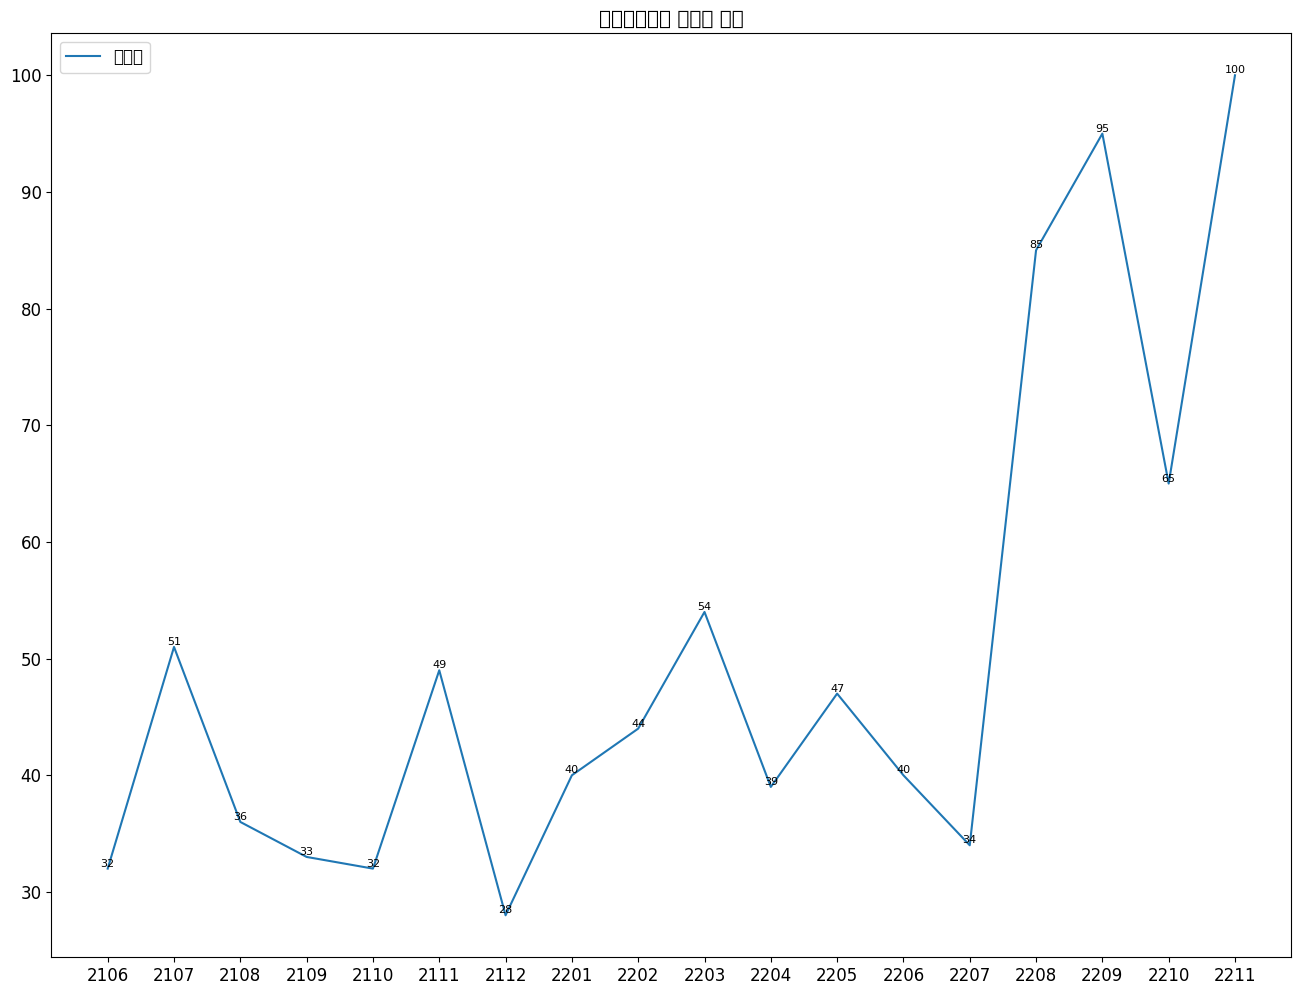

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.rc('font', size=12)
plt.figure(figsize=(16,12))

plt.plot(df['Date'], df['ageout'])
for i in range(len(df)):
  plt.text(i, df['ageout'][i], df['ageout'][i], fontsize=8, 
           horizontalalignment='center', verticalalignment='bottom')

plt.legend(['검색량'], loc='upper left')
plt.title('자립준비청년 검색량 추이')